## Darwin finches

Many of the important observations that led Charles Darwin to develop the theory of evolution were made in the Galápagos archipelago, particularly in the study of the small birds, called finches, that inhabit them. The islands are ideal for studying evolution because they are isolated so they do not have complicated effects from interactions with other species including humans. Furthermore, some of them are small, so entire populations can be monitored on a given island. Every year since 1973, Peter and Rosemary Grant of Princeton University have been spending several months of the year on the tiny volcanic cinder cone island of Daphne Major in the Galápagos.  

This island has two dominant ground finch species, **Geospiza fortis** and **Geospiza scandens**. The Grants have monitored them every year, tagging them, making physiological measurements, taking samples for genetic sequencing, and more.  

We will work with the Grants' measurements of the beak length and beak depth. We will consider different aspects of the beak geometry, including how it varies over time, from species to species, and from parents to offspring.







In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

from warnings import filterwarnings
filterwarnings("ignore")

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
fin_1975_df = pd.read_csv("https://assets.datacamp.com/production/repositories/470/datasets/eb228490f7d823bfa6458b93db075ca5ccd3ec3d/finch_beaks_1975.csv",
                          names = ['species', 'blength', 'bdepth'],
                          header = 1,
                          index_col = 0)

fin_1975_df.reset_index(drop=True, inplace=True)
fin_1975_df["year"] = 1975

fin_2012_df = pd.read_csv("https://assets.datacamp.com/production/repositories/470/datasets/b28d5bf65e38460dca7b3c5c0e4d53bdfc1eb905/finch_beaks_2012.csv",
                          names = ['species', 'blength', 'bdepth'],
                          header = 1,
                          index_col = 0)

fin_2012_df.reset_index(drop=True, inplace=True)
fin_2012_df["year"] = 2012


In [3]:
fin_1975_df.head(3)

,species,blength,bdepth,year
0,fortis,9.2,8.3,1975
1,fortis,9.5,7.5,1975
2,fortis,9.5,8.0,1975


In [4]:
fin_2012_df.head(3)

,species,blength,bdepth,year
0,fortis,12.5,8.9,2012
1,fortis,9.3,7.5,2012
2,fortis,10.3,9.6,2012


Append the two DataFrames

In [5]:
df = fin_1975_df.append(fin_2012_df)

In [6]:
df.shape

(649, 4)

---

In [7]:
#create one DataFrame per species

In [8]:
scandens_df = df[df["species"] == "scandens"]
scandens_df.reset_index(drop=True, inplace=True)

fortis_df = df[df["species"] == "fortis"]
fortis_df.reset_index(drop=True, inplace=True)


---

## Exploratory Data Analysis

EDA of beak depths of Darwin's scandens finches  

I will study how the beak depth (the distance, top to bottom) of the **finch scandens species** has changed over time.

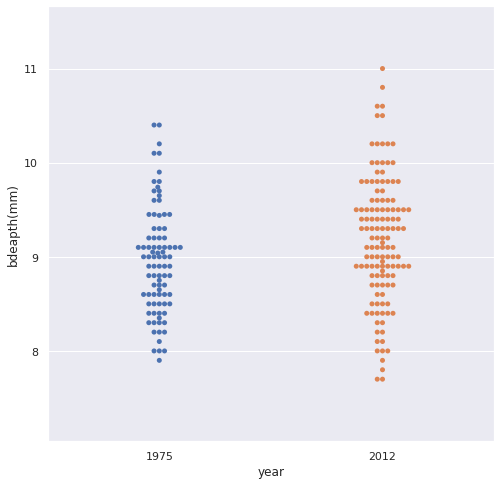

In [9]:
# Create bee swarm plot of finches scadens

plt.figure(figsize=(8,8))
sns.swarmplot(x="year", y="bdepth", data=scandens_df)

# Label the axes
plt.xlabel('year')
plt.ylabel('bdeapth(mm)')

plt.margins(0.2)

# Show the plot
plt.show()

It's a bit difficult to see if there is a clear difference between the 1975 and 2012 data set.  
It seems that the mean of the 2012 data might be slightly higher, and it might have a bigger variance.

In [10]:
#function for compute ECDF 

In [11]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [12]:
bdepth_1975 = scandens_df[scandens_df["year"]==1975]["bdepth"].values
bdepth_2012 = scandens_df[scandens_df["year"]==2012]["bdepth"].values

In [13]:
#compute ECDF
x_1975, y_1975 = ecdf(bdepth_1975)
x_2012, y_2012 = ecdf(bdepth_2012)

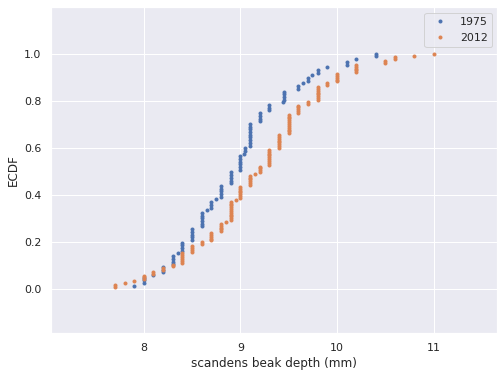

In [14]:
#set figure size
plt.figure(figsize=(8, 6))

#plot the ECDF
plt.plot(x_1975, y_1975,
         marker='.',
         linestyle="none",
         label="1975")

plt.plot(x_2012, y_2012,
         marker='.',
         linestyle="none",
         label="2012")

#set margin an
plt.margins(0.2)

#add labels and legends
plt.xlabel("scandens beak depth (mm)")
plt.ylabel("ECDF")
plt.legend()

#show plot
plt.show()

The differences are much clearer in the ECDF.  
The mean is larger in the 2012 data, and the variance does appear larger as well.

----

### Parameter estimates of beak depths

I want to see the result I would get if I repeated the data acquisition an infinite number of times.

To do this I will use bootstrapping's technique.  

Terminology:
- **bootstrap sample**: a resample array of the data
- **bootstrap replicate**: a statistic computed from a resampled array  

The idea is that we resample the data we have and recompute the summary statistic of interest.

In [15]:
#compute the summary statistic: difference of the sample means
mean_diff = np.mean(bdepth_2012) - np.mean(bdepth_1975)
mean_diff

0.22622047244094645

In [16]:
#definition of a function for generating replicate of 1D data
def bootstrap_replicate_1d(data, func):
    
    """Generate bootstrap replicate for 1D data"""
    
    bs_sample = np.random.choice(data, len(data))
    
    return func(bs_sample)

In [17]:
#definition of a function for generating many bootstrap replicates
def draw_bootstraps_reps(data, func, size=1):
    
    """Compute bootstrap replicates"""
    
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    
    return bs_replicates

---

In [18]:
#get 10000 bootstrap replicates (bs_reps=mean) of 1975's
bs_replicates_1975 = draw_bootstraps_reps(bdepth_1975, np.mean, size=10000)

In [19]:
#Focus
mean_bdepth_1975 = np.mean(bdepth_1975)
mean_replicates_1975 = np.mean(bs_replicates_1975)

print("mean of the observation: ", mean_bdepth_1975)
print("mean of the replicates: ", mean_replicates_1975)

mean of the observation:  8.959999999999999
mean of the replicates:  8.96005840229885


For the Central Limit Theorem, as we can see, the mean of the observations and the mean of the sample mean are the same.

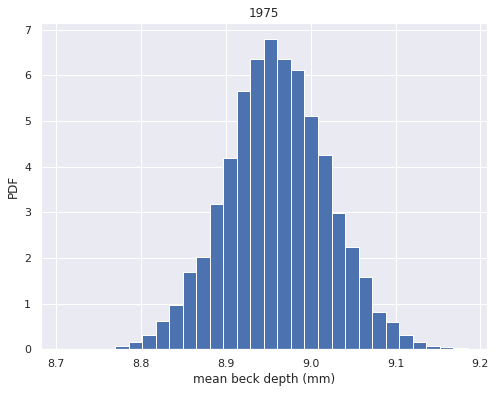

In [20]:
#plot PDF of bootstrap replicates of beak depth in 1975
plt.figure(figsize=(8,6))

plt.hist(bs_replicates_1975, bins=30, density=True)

plt.xlabel("mean beck depth (mm)")
plt.ylabel("PDF")
plt.title("1975")

plt.show()

We can see that, ever for the Central Limit Theorem, the distribution of the bootstrap replicates look like a Normal distribution.

---

In [21]:
#get 10000 bootstrap replicates (bs_reps=mean) of 2012's
bs_replicates_2012 = draw_bootstraps_reps(bdepth_2012, np.mean, size=10000)

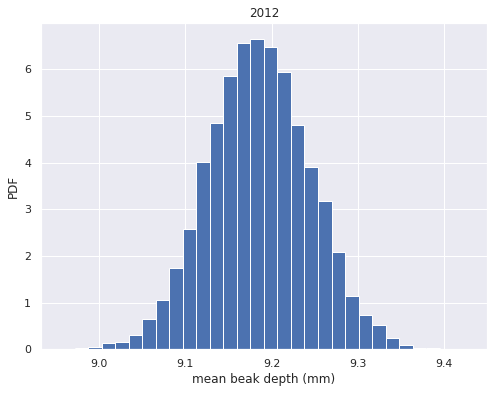

In [22]:
#plot PDF of bootstrap replicates of beak depth in 2012
plt.figure(figsize=(8,6))

plt.hist(bs_replicates_2012, bins=30, density=True)

plt.xlabel("mean beak depth (mm)")
plt.ylabel("PDF")
plt.title("2012")

plt.show()

---

In [23]:
#compute the difference of the bootstrap samples
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

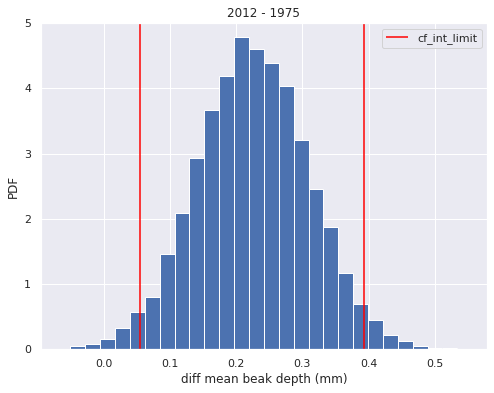

In [24]:
#plot PDF of bootstrap replicates of beak depth in 2012
plt.figure(figsize=(8,6))

plt.hist(bs_diff_replicates, bins=30, density=True)
plt.vlines(x=0.05388282, ymin=0, ymax=5, color="red", label = "cf_int_limit")
plt.vlines(x=0.39351785, ymin=0, ymax=5, color="red")


plt.xlabel("diff mean beak depth (mm)")
plt.ylabel("PDF")
plt.title("2012 - 1975")
plt.legend(loc='upper right')

plt.margins(0)
plt.show()

In [25]:
#compute the 95% confidence interval
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

In [26]:
print('difference of means: ', mean_diff, 'mm')
print('95% confidence interval: ', conf_int, 'mm')

difference of means:  0.22622047244094645 mm
95% confidence interval:  [0.05958254 0.39004799] mm


If we repeated measurements over and over again, 95% of the observed values would lie within the 95% confidence interval [0.05388282 0.39351785].

---

## Hypothesis test: Are beaks deeper in 2012 ?

From plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of Geospiza scandens have gotten deeper.  

What is the probability that we would get the observed difference in mean beak depth if the means were the same (same distributon)?

**Null hypothesis**: the two datasets have the same distribution.

So we could use a permutation, compute the new mean and shift the two data sets so they have the same mean.  
After we could use a bootstrap sampling to compute the difference of means.

In [27]:
#combination of the data and computation of the mean
combined_mean = np.mean(np.concatenate((bdepth_1975, bdepth_2012)))

In [28]:
#shift the samples
bdepth_1975_shifted = bdepth_1975 - np.mean(bdepth_1975) + combined_mean
bdepth_2012_shifted = bdepth_2012 - np.mean(bdepth_2012) + combined_mean

In [29]:
#get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bootstraps_reps(data=bdepth_1975_shifted,
                                          func=np.mean,
                                          size=10000)

bs_replicates_2012 = draw_bootstraps_reps(data=bdepth_2012_shifted,
                                          func=np.mean,
                                          size=10000)

In [30]:
#compute replicates difference of means
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

In [31]:
#compute the p-value
p_val = np.sum(bs_diff_replicates >= mean_diff)/10000

In [32]:
print("p_value: ", p_val)

p_value:  0.0036


The p_value suggest to reject the null hypothesis: there is a statistically significant difference between the mean of the two data sets.  
Before we had see that this difference is equal to 0.2 mm.  
So we can say that the 0.2 mm changing in beak depth of Geospiza scadens in 37 years is substantial for the evolutionary standards.  
If it kept changing at that rate, the beak depth would double in only 400 years.

---

## Variation in beak shapes  

We just determined that the beak depth of Geospiza scandens changed over the course of 37 years.  
One reason of this change may be a drought in 1976 and 1977 that resulted in the death of the plants that produce small seeds on the island. The larger seeds required deeper beaks to crack them, so large-beaked birds survived and then reproduced.
If this is the case, it stands to reason that the length of the beak might also change over time. Importantly, if the length and depth change at the same rate.  

Source: Grant and Grant, 2014

In [33]:
scandens_df.head()

,species,blength,bdepth,year
0,scandens,13.9,8.4,1975
1,scandens,14.0,8.8,1975
2,scandens,12.9,8.4,1975
3,scandens,13.5,8.0,1975
4,scandens,12.9,7.9,1975


In [34]:
#select length columns per year
blength_1975 = scandens_df[scandens_df["year"]==1975]["blength"].values
blength_2012 = scandens_df[scandens_df["year"]==2012]["blength"].values

In [35]:
#inspect the relation between length and depth through a scatterplot
  

plt.show()

From the plot we can observe that the beaks are becom deeper (the red point are higher in the y direction), but not really longer.  
In the course of the years, the beaks have changed shape: they became shorter and deeper.

**Linear regression**  
Perform a linear regression for 1975 and 2012 data.

In [36]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(blength_1975, bdepth_1975, 1)
slope_2012, intercept_2012 = np.polyfit(blength_2012, bdepth_2012, 1)

**Pairs bootstrap**  
How slope and intercept change if we take the measurments again, under identical conditions?  
Resample data in pairs

In [37]:
#definition of a function for compute bootstrap pair reps of linear regression
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [38]:
# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
draw_bs_pairs_linreg(blength_1975, bdepth_1975, 1000)

bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(blength_2012, bdepth_2012, 1000)

In [39]:
# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])

In [40]:
# Compute confidence intervals of intercepts
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

In [41]:
# Print the results
print('1975: slope =', slope_1975,
      '| conf int =', slope_conf_int_1975)

print('1975: intercept =', intercept_1975,
      '| conf int =', intercept_conf_int_1975, '\n')

print('2012: slope =', slope_2012,
      '| conf int =', slope_conf_int_2012)

print('2012: intercept =', intercept_2012,
      '| conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 | conf int = [0.33961528 0.5837128 ]
1975: intercept = 2.3908752365842263 | conf int = [0.73799568 4.17392074] 

2012: slope = 0.462630358835313 | conf int = [0.33564127 0.60269662]
2012: intercept = 2.977247498236019 | conf int = [1.12197713 4.66259275]


It looks like they have the same slope, but different intercepts.

**Displaying the linear regression results**

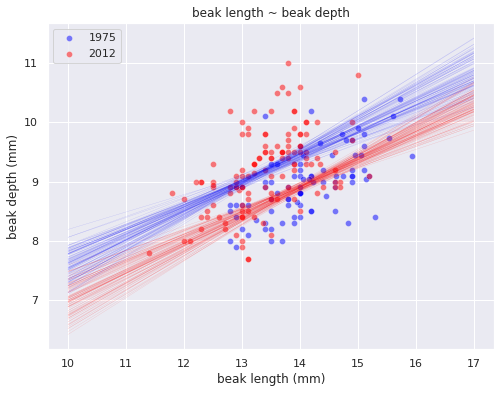

In [42]:
#scatter plot of 1975 and 2012 data
plt.figure(figsize=(8,6))
plt.title("beak length ~ beak depth")

sns.scatterplot(y=bdepth_1975, x=blength_1975, color='blue', alpha=0.5, label="1975")
sns.scatterplot(y=bdepth_2012, x=blength_2012, color='red', alpha=0.5, label="2012")

plt.ylabel("beak depth (mm)")
plt.xlabel("beak length (mm)")
plt.legend(loc='upper left')

#generate the x-values for the bootstrap lines
x = np.array([10, 17])

for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             alpha=0.2, color='red', linewidth=0.3)
    
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             alpha=0.2, color='blue', linewidth=0.3)

We can see that the slope was the same in 1975 and 2012, so for every millimiter gained in beak length, the birds gained about half millimiter in depth in both years.

In [43]:
#compute length-depth ratios
ratio_1975 = blength_1975 / bdepth_1975
ratio_2012 = blength_2012 / bdepth_2012

In [44]:
#compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

In [45]:
#generate bootstrap replicates of the means
bs_replicates_1975 = draw_bootstraps_reps(ratio_1975, np.mean, 1000)
bs_replicates_1975 = draw_bootstraps_reps(ratio_2012, np.mean, 1000)

In [46]:
#compute the 99% confidence interval
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

In [47]:
# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      '| conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      '| conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 | conf int = [1.44572242 1.4879074 ]
2012: mean ratio = 1.4658342276847767 | conf int = [8.94306927 9.25212635]


What is causing the beaks of Geospiza scandens to get bigger over time?  
A prevailing explanation is that scandens birds are mating the other major finch species on Daphne Major, Geopsiza fortis.   
We will investigate the extent to which parental beak depth is inherited by offspring in both scandens and fortis. You are applying your new statistical skills to a real, fundamental scientific problem.




---

## EDA of heritability

**Import heredity datasets**

In [48]:
fortis_bd_heredity_df = pd.read_csv("https://assets.datacamp.com/production/repositories/470/datasets/532cb2fecd1bffb006c79a28f344af2290d643f3/fortis_beak_depth_heredity.csv")

In [49]:
fortis_bd_heredity_df.head(3)

,Mid-offspr,Male BD,Female BD
0,10.70,10.9,9.3
1,9.78,10.7,8.4
2,9.48,10.7,8.1


In [50]:
scandens_bd_heredity_df = pd.read_csv("https://assets.datacamp.com/production/repositories/470/datasets/7ff772e1f4e99ed93685296063b6e604a334236d/scandens_beak_depth_heredity.csv")

In [51]:
scandens_bd_heredity_df.head(3)

,mid_parent,mid_offspring
0,8.3318,8.4190
1,8.4035,9.2468
2,8.5317,8.1532


**unify the columns of the two datasets**

In [52]:
#compute the mid_parent column as mean of Male BD and Female BD columns
fortis_bd_heredity_df["mid_parent"] = \
(fortis_bd_heredity_df["Male BD"].values + \
 fortis_bd_heredity_df["Female BD"].values)/2

In [53]:
#drop the Male BD and Female BD columns
fortis_bd_heredity_df.drop(["Male BD", "Female BD"], axis=1, inplace=True)

In [54]:
#rename Mid-offspr column
fortis_bd_heredity_df.rename({"Mid-offspr":"mid_offspring"}, axis=1, inplace=True)

In [55]:
#change the position of the columns
fortis_bd_heredity_df = fortis_bd_heredity_df[["mid_parent", "mid_offspring"]]

---

In [57]:
fortis_bd_heredity_df.head(3)

,mid_parent,mid_offspring
0,10.10,10.70
1,9.55,9.78
2,9.40,9.48


In [60]:
fortis_bd_heredity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mid_parent     413 non-null    float64
 1   mid_offspring  413 non-null    float64
dtypes: float64(2)
memory usage: 6.6 KB


---

In [58]:
scandens_bd_heredity_df.head(3)

,mid_parent,mid_offspring
0,8.3318,8.4190
1,8.4035,9.2468
2,8.5317,8.1532


In [61]:
scandens_bd_heredity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mid_parent     130 non-null    float64
 1   mid_offspring  130 non-null    float64
dtypes: float64(2)
memory usage: 2.2 KB


---

**See the correlation of parents and offsprings by a scatterplot**

In [62]:
scandens_parents = scandens_bd_heredity_df["mid_parent"].values
scandens_offsprings = scandens_bd_heredity_df["mid_offspring"].values

In [68]:
fortis_parents = fortis_bd_heredity_df["mid_parent"].values
fortis_offsprings = fortis_bd_heredity_df["mid_offspring"].values

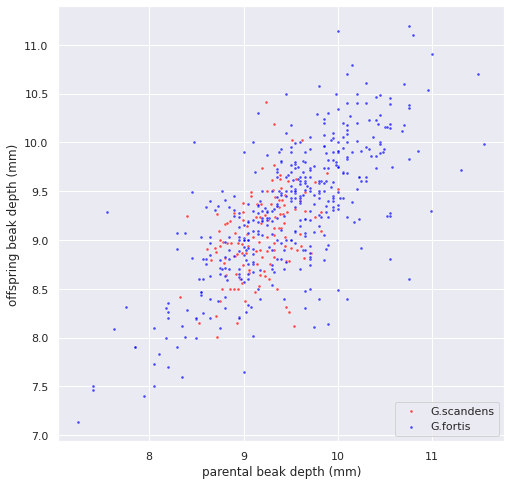

In [74]:
plt.figure(figsize=(8,8))

sns.scatterplot(scandens_parents, scandens_offsprings, 
                color='red', alpha=0.7, marker='.', label="G.scandens")

sns.scatterplot(fortis_parents, fortis_offsprings,
                color='blue', alpha=0.7, marker='.', label="G.fortis")

plt.xlabel('parental beak depth (mm)')
plt.ylabel('offspring beak depth (mm)')

# Add legend
plt.legend(loc='lower right')

# Show plot
plt.show()

We can se that there is a stronger correlation in G. fortis than in G. scandens.  
This suggests that beak depth is more strongly inherited in G. fortis. We'll quantify this correlation next.

We would like to compute the Pearson correlation coefficient, between parents and offspring.  
To get confidence intervals on this, we need to do a pairs bootstrap.

In [80]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

In [81]:
#definition of a function to compute the correlation coefficient
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    
    #compute the correlation matrix
    corr_mat = np.corrcoef(x,y)
    
    return corr_mat[0,1]
    

In [85]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(scandens_parents, scandens_offsprings)
r_fortis = pearson_r(fortis_parents, fortis_offsprings)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(scandens_parents,          
                                       scandens_offsprings, 
                                       pearson_r, 1000)

bs_replicates_fortis = draw_bs_pairs(fortis_parents, 
                                     fortis_offsprings, 
                                     pearson_r, 1000)



# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])
# Print results
print('G. scandens:', r_scandens, "| ",conf_int_scandens)
print('G. fortis:', r_fortis,  "| ", conf_int_fortis)


G. scandens: 0.4117063629401258 |  [0.27057236 0.54127927]
G. fortis: 0.7283412395518487 |  [0.67057185 0.77849386]


It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents is more strongly correlated with their offspring than their G. scandens counterparts.